contains exploration of noe
including right coord system 

In [3]:
#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
%matplotlib inline
data=pd.read_csv('output/NOE.csv')
#exclude nulls
#data=data[data.loc[:,'RECHTSWERT']!=0]
data.dropna(subset=['RECHTSWERT'],how='any',inplace=True)


In [4]:
data.columns

Index(['BEZIRK', 'NAME', 'EW60', 'INBETRIEBNAHME', 'RECHTSWERT', 'HOCHWERT',
       'bautyp', 'tech_type', 'activity', 'geometry'],
      dtype='object')

In [5]:
#get gdf. this combi is the correct one
gdf=geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy((data['RECHTSWERT']), data['HOCHWERT'], crs='GKM34'))
#gdf.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','RECHTSWERT', 'HOCHWERT', ],inplace=True)
gdf.to_crs(epsg=4326,inplace=True)
gdf.rename(columns={'EW60_BEWILLIGT':'EW60','BEWILLIGUNGSJAHR':'INBETRIEBNAHME'},inplace=True)
gdf.to_csv('output/noe_geo.csv', index=False)
#gdf.info()


<AxesSubplot:>

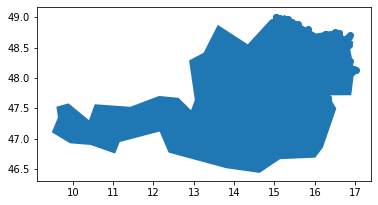

In [6]:
#project on boundaries.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
austria=world[world['name']=='Austria']
gdf.to_crs(epsg=4326,inplace=True)
gdf.plot(ax=austria.plot())


In [7]:
#get real boundaries
bezirke=geopandas.read_file(r'C:\Users\fabrizio\Documents\repos\MSC\DATA\Sacken\shp\OGDEXT_POLBEZ_1_STATISTIK_AUSTRIA_20200101\STATISTIK_AUSTRIA_POLBEZ_20200101Polygon.shp')
bezirke.to_crs(epsg='4326', inplace=True)
#gdf.plot(color='red', ax=bezirke.plot())
bezirke.columns


Index(['id', 'name', 'geometry'], dtype='object')

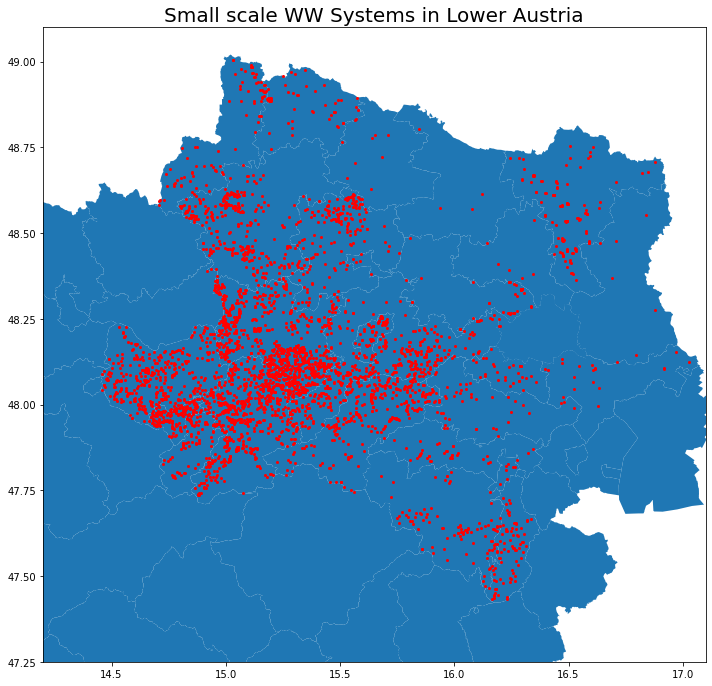

In [8]:
#define figure and axes
fig,ax=plt.subplots(1,figsize=(10,15))
#get background
bezirke.plot(ax=ax)
#zoom In
ax.set_xlim(14.2,17.1)
ax.set_ylim(47.25,49.1)
#get points
gdf.plot(color='red',ax=ax, markersize=4)
#extra
ax.set_title('Small scale WW Systems in Lower Austria', fontsize=20)
plt.tight_layout()

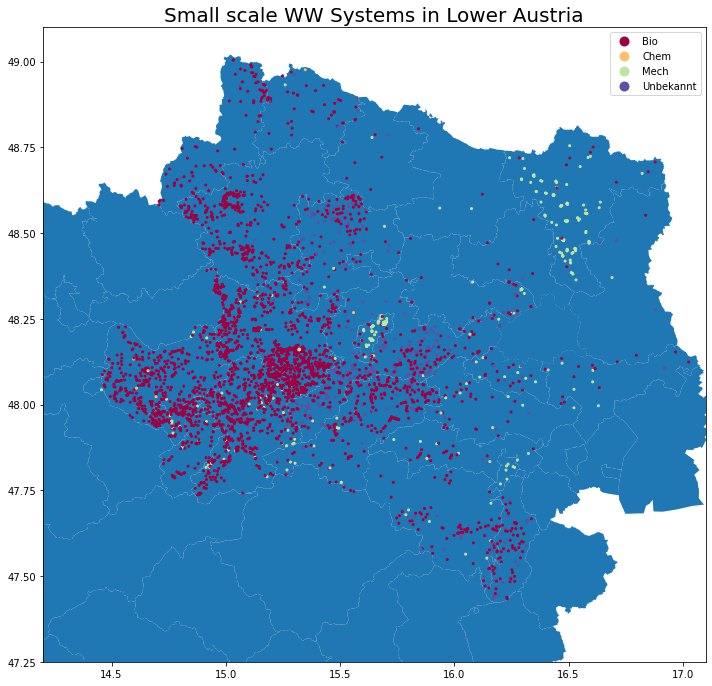

In [9]:
#categorical map
fig,ax=plt.subplots(1,figsize=(10,15))
bezirke.plot(ax=ax)
ax.set_xlim(14.2,17.1)
ax.set_ylim(47.25,49.1)
gdf.plot(column='bautyp',categorical=True,cmap='Spectral', ax=ax, markersize=4, legend=True)
ax.set_title('Small scale WW Systems in Lower Austria', fontsize=20)
plt.tight_layout()


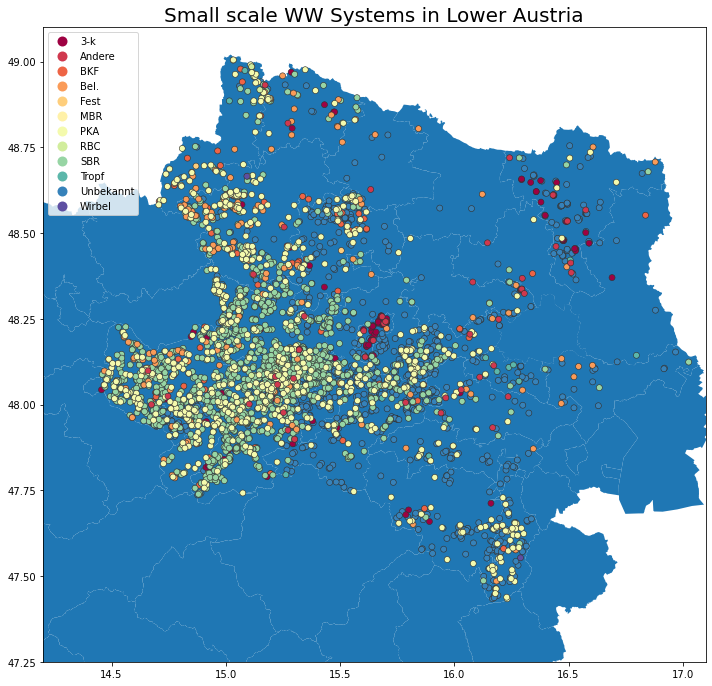

In [10]:
fig,ax=plt.subplots(1,figsize=(10,15))
bezirke.plot(ax=ax)
ax.set_xlim(14.2,17.1)
ax.set_ylim(47.25,49.1)
gdf.plot(column='tech_type',categorical=True,cmap='Spectral', ax=ax, linewidth=.6, edgecolor='0.2',legend=True)
ax.set_title('Small scale WW Systems in Lower Austria', fontsize=20)
plt.tight_layout()



In [11]:
#howmany points per polygon?
choro=geopandas.overlay(gdf,bezirke, how='intersection')


<AxesSubplot:>

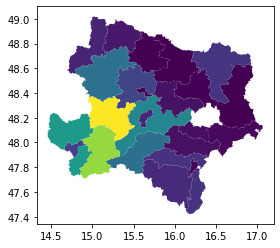

In [12]:
#prepare data for choropleth
choro_count=choro.groupby('name')['name'].count()
choro_step=pd.merge(left=bezirke, right=choro_count,left_on='name', right_index=True)
choro_step.plot(column='name_y', )

In [16]:
minx, miny, maxx, maxy=choro_step.total_bounds

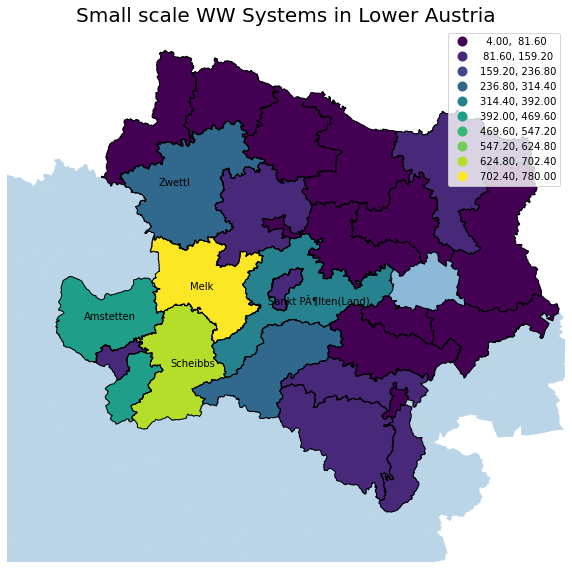

In [18]:
fig,ax=plt.subplots(1,figsize=(10,15))
bezirke.plot(ax=ax, alpha=0.3)
choro_step.plot(ax=ax)


ax.set_xlim(14.2,17.1)
ax.set_ylim(47.25,49.1)

choro_step.plot(column='name_y', ax=ax,legend=True,scheme='equal_interval', k=10)
ax.set_title('Small scale WW Systems in Lower Austria', fontsize=20)

choro_step.geometry.boundary.plot(edgecolor='k', linewidth=1, ax=ax)

#get representative point for annotations
choro_step['coords'] = choro_step['geometry'].apply(lambda x: x.representative_point().coords[:])
choro_step['coords'] = [coords[0] for coords in choro_step['coords']]

#only label first 5 bezirke 
choro_step.sort_values('name_y', inplace=True, ascending=False)
for idx, row in choro_step.head().iterrows():
    plt.annotate(text=row['name_x'], xy=row['coords'],horizontalalignment='center')

ax.set_axis_off()
plt.savefig('try.png')

In [14]:
choro_step


,name,id,name_x,geometry,name_y,coords
33,Melk,315,Melk,"POLYGON ((14.97406 48.12476, 14.97404 48.12482...",780,"(15.209687708610463, 48.19265573039252)"
38,Scheibbs,320,Scheibbs,"POLYGON ((15.03472 47.75274, 15.03445 47.75268...",657,"(15.162306717086622, 47.92752298853571)"
23,Amstetten,305,Amstetten,"MULTIPOLYGON (((14.88515 47.80779, 14.88571 47...",425,"(14.732627364168916, 48.08978607326526)"
37,Sankt PÃ¶lten(Land),319,Sankt PÃ¶lten(Land),"POLYGON ((15.81229 48.07803, 15.81218 48.07806...",361,"(15.817645751944742, 48.13860611001121)"
42,Zwettl,325,Zwettl,"POLYGON ((15.14000 48.34468, 15.13966 48.34461...",291,"(15.068165816709877, 48.553484740671664)"
32,Lilienfeld,314,Lilienfeld,"POLYGON ((15.62409 47.87489, 15.62402 47.87479...",287,"(15.567583208984068, 47.91778941439401)"
31,Krems(Land),313,Krems(Land),"POLYGON ((15.59368 48.44229, 15.59366 48.44227...",159,"(15.482021794146455, 48.45097433175668)"
21,Waidhofen an der Ybbs(Stadt),303,Waidhofen an der Ybbs(Stadt),"POLYGON ((14.83065 47.96825, 14.83066 47.96825...",158,"(14.744518516520742, 47.95126998356997)"
34,Mistelbach,316,Mistelbach,"POLYGON ((16.31289 48.59023, 16.31318 48.58997...",120,"(16.53441560519758, 48.56442287171741)"
41,Wiener Neustadt(Land),323,Wiener Neustadt(Land),"MULTIPOLYGON (((16.17177 47.42240, 16.17173 47...",115,"(15.944261751113082, 47.86586437921604)"
